In [ ]:
# The script version of this tool can be found at: 
#      repo/emulator_Nx2pt/emu_Nx2pt/gen_train_set/draw_pco_params.py

In [1]:
import numpy as np
from pyDOE import lhs
import time
import pandas as pd

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rc('font', size=16)

In [2]:
file_chainsummary = '/home/hhg/Research/emu_Nx2pt/data/RomanxSO_10x2pt_modified_w0wa_1Dsummary.csv'

df = pd.read_csv(file_chainsummary, index_col=0)
df

,mean,sigma,low,high
Omega_m,0.315975,0.007890,0.292304,0.339645
sigma_8,0.831229,0.006842,0.810703,0.851756
n_s,0.961270,0.018267,0.906469,1.016072
w0,-0.991678,0.094447,-1.275020,-0.708336
wa,-0.022786,0.326175,-1.001310,0.955737
Omega_b,0.048489,0.003502,0.037982,0.058996
h0,0.673549,0.028843,0.587021,0.760077
A_ia,0.498219,0.033918,0.396465,0.599972
eta_ia,-0.029277,0.213353,-0.669334,0.610781
gas_0,1.170026,0.003732,1.158831,1.181221


In [3]:
# generate the par_lim dictionary

par_lim = {}

for par in df.index:
    par_lim[par] = [df.loc[par].low, df.loc[par].high]

In [4]:
par_lim

{'Omega_m': [0.292303923742277, 0.3396453141045375],
 'sigma_8': [0.810703027929464, 0.8517555614692183],
 'n_s': [0.9064686711332884, 1.016072289444578],
 'w0': [-1.2750201297142, -0.7083362873653598],
 'wa': [-1.0013101704027725, 0.955737456798141],
 'Omega_b': [0.0379819006026384, 0.0589961710728199],
 'h0': [0.587020833933262, 0.7600767712279245],
 'A_ia': [0.3964649261512384, 0.5999722322118082],
 'eta_ia': [-0.669334216464801, 0.610781208567453],
 'gas_0': [1.1588307134967144, 1.1812206822337574],
 'gas_1': [0.2631189602110799, 0.961866433535204],
 'gas_2': [13.400005277814063, 14.691052657806928],
 'gas_3': [0.6299427061955813, 1.4489054259233436],
 'gas_7': [6.349839942413765, 6.664870758408854],
 'gas_8': [0.6636812212620018, 0.836051906073414],
 'gas_9': [-0.258882650853274, 0.2711141870666721],
 'gas_10': [-0.224249674633295, 0.2356838733364756]}

In [ ]:
# par_lim = {
#     'Omega_m': [ 0.2  , 0.4   ],
#     'sigma_8': [ 0.8  , 0.85  ],
#     'Omega_b': [ 0.042, 0.050 ],
#     'n_s'    : [ 0.9  , 1.02  ], 
#     'h'      : [ 0.6  , 0.8   ],
# }
# 1,000,000 points
# avg. x^2 (exclude boundary) ... 
# 

In [5]:
def rescale(arr_in, domain):
    return domain[0] + arr_in * (domain[1]-domain[0])

In [6]:
def draw_lhs_samples(Npts, par_lim, criterion='cm'):
    '''
    criterion: a string that tells lhs how to sample the points (default: None, which simply randomizes the points within the intervals):
        “center” or “c”: center the points within the sampling intervals
        “maximin” or “m”: maximize the minimum distance between points, but place the point in a randomized location within its interval
        “centermaximin” or “cm”: same as “maximin”, but centered within the intervals
        “correlation” or “corr”: minimize the maximum correlation coefficient
    '''
    
    Ndim = len(par_lim)
    

    #start = time.time()
    samples = lhs(Ndim, samples=Npts, criterion=criterion)
    #end = time.time()
    #period = (end - start)/60.
    #print(f'lhs finished: {period} mins')
    
    samples_dict = {}
    for j, key in enumerate(par_lim.keys()):
        samples_dict[key] = rescale(arr_in=samples[:, j], domain=par_lim[key])
        
    return samples_dict

In [7]:
Npts = 100
pco_samples = draw_lhs_samples(Npts=Npts, par_lim=par_lim)

In [8]:
pco_samples

{'Omega_m': array([0.32331253, 0.29680136, 0.32236571, 0.30437598, 0.30106208,
        0.30958353, 0.31053036, 0.33183398, 0.29964184, 0.31573791,
        0.31147719, 0.30532281, 0.3185784 , 0.29254063, 0.33846178,
        0.30153549, 0.31810498, 0.2949077 , 0.32141888, 0.32425936,
        0.33041374, 0.32378595, 0.32757326, 0.3152645 , 0.30390256,
        0.30484939, 0.33940861, 0.30626963, 0.33893519, 0.3356213 ,
        0.30911012, 0.29348746, 0.31479108, 0.30768988, 0.31005695,
        0.33609471, 0.31763157, 0.31337084, 0.33088716, 0.31621133,
        0.31999864, 0.32047205, 0.31431767, 0.33278081, 0.2982216 ,
        0.33372764, 0.29396087, 0.32994033, 0.31905181, 0.3289935 ,
        0.33467447, 0.30816329, 0.31952522, 0.32094546, 0.30200891,
        0.33514788, 0.32804667, 0.30342915, 0.32946692, 0.30248232,
        0.29443429, 0.33136057, 0.3323074 , 0.33420105, 0.31289743,
        0.31668474, 0.31100377, 0.29632794, 0.29301404, 0.33704154,
        0.31242401, 0.29774818, 0.299

In [9]:
data_dir = '/home/hhg/Research/emu_Nx2pt/data/'
filename = data_dir+f'pco_{Npts}.pkl'
print(f'output file to:', filename)

output file to: /home/hhg/Research/emu_Nx2pt/data/pco_100.pkl


In [10]:
import pickle

with open(filename, 'wb') as handle:
    pickle.dump(pco_samples, handle)

In [11]:
pco_samples

{'Omega_m': array([0.32331253, 0.29680136, 0.32236571, 0.30437598, 0.30106208,
        0.30958353, 0.31053036, 0.33183398, 0.29964184, 0.31573791,
        0.31147719, 0.30532281, 0.3185784 , 0.29254063, 0.33846178,
        0.30153549, 0.31810498, 0.2949077 , 0.32141888, 0.32425936,
        0.33041374, 0.32378595, 0.32757326, 0.3152645 , 0.30390256,
        0.30484939, 0.33940861, 0.30626963, 0.33893519, 0.3356213 ,
        0.30911012, 0.29348746, 0.31479108, 0.30768988, 0.31005695,
        0.33609471, 0.31763157, 0.31337084, 0.33088716, 0.31621133,
        0.31999864, 0.32047205, 0.31431767, 0.33278081, 0.2982216 ,
        0.33372764, 0.29396087, 0.32994033, 0.31905181, 0.3289935 ,
        0.33467447, 0.30816329, 0.31952522, 0.32094546, 0.30200891,
        0.33514788, 0.32804667, 0.30342915, 0.32946692, 0.30248232,
        0.29443429, 0.33136057, 0.3323074 , 0.33420105, 0.31289743,
        0.31668474, 0.31100377, 0.29632794, 0.29301404, 0.33704154,
        0.31242401, 0.29774818, 0.299

## Check generate samples

In [12]:
Npts = 100
pco_samples = draw_lhs_samples(Npts=Npts, par_lim=par_lim)

Text(0, 0.5, '$\\sigma_8$')

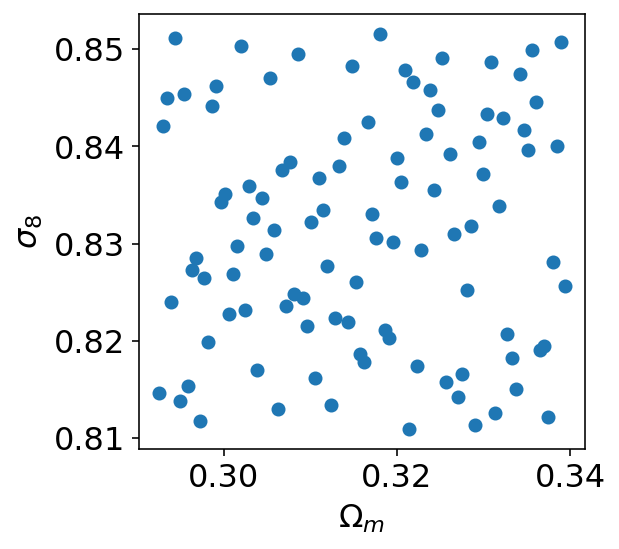

In [13]:
plt.figure(figsize=(4,4))
plt.scatter(pco_samples['Omega_m'], pco_samples['sigma_8'])
plt.xlabel('$\Omega_m$')
plt.ylabel('$\sigma_8$')

### Time Estimate of pyDOE.lhs

In [11]:
from pyDOE import lhs

In [12]:
%time samples_ori = lhs(5, samples=1000, criterion='cm')

CPU times: user 8.49 s, sys: 52.2 ms, total: 8.54 s
Wall time: 8.54 s


In [13]:
%time samples_ori = lhs(5, samples=2000, criterion='cm')

CPU times: user 33.9 s, sys: 202 ms, total: 34.1 s
Wall time: 34.1 s


In [14]:
%time samples_ori = lhs(5, samples=4000, criterion='cm')

CPU times: user 2min 15s, sys: 753 ms, total: 2min 15s
Wall time: 2min 15s


- It looks like the run time of `pyDOE.lhs` scales as O(n^2).
- If drawing 1000 points takes ~10 seconds. 0.6M points would take me ~ 600^2x10 seconds = 1000 hours...

In [15]:
%time samples_ori = lhs(5, samples=1000, criterion='c')

CPU times: user 1.52 ms, sys: 17 µs, total: 1.54 ms
Wall time: 1.04 ms


In [16]:
%time samples_ori = lhs(5, samples=2000, criterion='c')

CPU times: user 1.73 ms, sys: 22 µs, total: 1.76 ms
Wall time: 1.2 ms


In [17]:
%time samples_ori = lhs(5, samples=4000, criterion='c')

CPU times: user 0 ns, sys: 2.43 ms, total: 2.43 ms
Wall time: 1.6 ms
